In [1]:
import torch.nn as nn
import torch

from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms


In [2]:
img_transformation = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
])

In [3]:
# train_dataset = datasets.MNIST(root="./data", transform=img_transformation, train=True, download=True)
# test_dataset = datasets.MNIST(root="./data", transform=img_transformation, train=False, download=True)

In [4]:
train_dataset = datasets.MNIST(root="./data", transform=img_transformation, train=True, download=True)
test_dataset = datasets.MNIST(root="./data", transform=img_transformation, train=False, download=True)

In [5]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [6]:
train_dataset[0][0].squeeze().shape

torch.Size([28, 28])

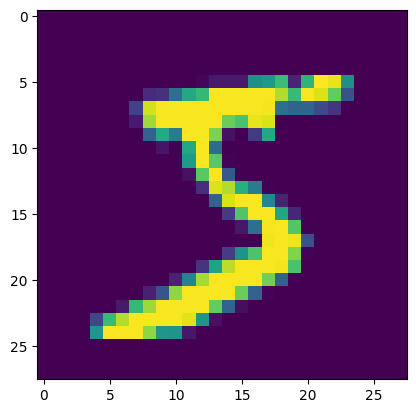

In [7]:
import matplotlib.pyplot as plt
plt.imshow(train_dataset[0][0].squeeze())

In [8]:
train_dataset[0][1]

5

In [9]:
from torch.utils.data import random_split
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size

train_dataset, val_dataset = random_split(train_dataset, (train_size, val_size))

In [11]:
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=False)
test_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=False)

In [40]:
import torch.nn.functional as F
class DigitClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.reshape(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        # output = self.softmax(self.fc3(x))
        output = self.fc3(x)
        return output

In [18]:
import numpy as np
x = np.random.randn(28,28)
x.reshape(-1, 28 * 28)

array([[ 6.64899109e-01, -8.76084517e-01, -1.33455011e+00,
        -5.40589638e-02,  1.48571686e+00,  5.08687194e-01,
         8.31510836e-01,  9.84841715e-01, -1.69657874e-01,
        -1.17468465e+00, -6.01138180e-01, -9.64921815e-01,
        -1.65358904e+00, -4.83219416e-02,  4.28308383e-01,
         1.00238538e+00, -1.02078410e+00, -2.10250268e+00,
        -2.73411552e-01,  1.10733670e+00,  1.50622912e+00,
        -6.84753282e-01,  2.35966126e-01, -7.07317898e-01,
         3.14878627e-01, -3.77668416e-01,  1.79235568e+00,
        -1.95456059e-01, -4.16155370e-01, -9.36043111e-02,
         2.61561989e-01, -2.81162079e-01,  1.22976331e+00,
        -1.73473047e+00,  4.51206355e-03, -1.29611474e+00,
        -1.87138171e-01,  5.82106622e-01,  1.10773492e+00,
        -2.59642939e+00, -5.92005477e-01,  1.18377959e+00,
         2.03870451e+00, -1.60654383e+00, -5.94198604e-01,
         7.52210985e-01, -8.36403483e-01, -5.34027466e-01,
         5.29797493e-02, -1.36096191e+00, -8.44380421e-0

In [26]:
model = DigitClassifier().to("cpu")
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [27]:
def taining(model, loader, criterion, optimizer):
    model.train()
    running_loss = 0
    correct = 0
    total = 0

    for images , labels in loader:

        # Loading the data to CPU/ GPU
        images, labels = images.to("cpu"), labels.to("cpu")
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    acuracy = correct/ total
    epoch_loss = running_loss / total
    return epoch_loss, acuracy

    

In [34]:
def evaluate(model, loader, criterion):
    model.eval()
    running_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to("cpu"), labels.to("cpu")

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    epoch_loss = running_loss / total
    accuracy = correct / total
    return epoch_loss, accuracy

In [35]:
number_of_epoch = 10

for epoch in range(1, number_of_epoch+1):
    train_loss, train_acc = taining(model, train_dataloader, criterion, optimizer)
    val_loss, val_acc = evaluate(model, val_dataloader, criterion)

    print(f"Epoch: {epoch}/{number_of_epoch}")
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}")
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

Epoch: 1/10
Train Loss: 0.1680, Train Accuracy: 0.9556
Validation Loss: 0.1609, Validation Accuracy: 0.9582
Epoch: 2/10
Train Loss: 0.1690, Train Accuracy: 0.9558
Validation Loss: 0.1221, Validation Accuracy: 0.9679
Epoch: 3/10
Train Loss: 0.1690, Train Accuracy: 0.9556
Validation Loss: 0.1921, Validation Accuracy: 0.9503
Epoch: 4/10
Train Loss: 0.1532, Train Accuracy: 0.9613
Validation Loss: 0.1373, Validation Accuracy: 0.9623
Epoch: 5/10
Train Loss: 0.1564, Train Accuracy: 0.9603
Validation Loss: 0.1525, Validation Accuracy: 0.9616
Epoch: 6/10
Train Loss: 0.1611, Train Accuracy: 0.9589
Validation Loss: 0.1701, Validation Accuracy: 0.9558
Epoch: 7/10
Train Loss: 0.1585, Train Accuracy: 0.9596
Validation Loss: 0.1341, Validation Accuracy: 0.9654
Epoch: 8/10
Train Loss: 0.1532, Train Accuracy: 0.9612
Validation Loss: 0.1805, Validation Accuracy: 0.9520
Epoch: 9/10
Train Loss: 0.1530, Train Accuracy: 0.9611
Validation Loss: 0.1236, Validation Accuracy: 0.9676
Epoch: 10/10
Train Loss: 0.1

In [36]:
test_loss, test_acc = evaluate(model, test_dataloader, criterion)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

Test Loss: 0.1233, Test Accuracy: 0.9656


In [37]:
torch.save(model.state_dict(), "mnist_digit_classifier.pth")
print("Model is saved!!!")

Model is saved!!!


In [39]:
# Load the model
loaded_model = DigitClassifier().to("cpu")
loaded_model.load_state_dict(torch.load("mnist_digit_classifier.pth", weights_only=True))
loaded_model.eval()

DigitClassifier(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (softmax): LogSoftmax(dim=10)
)

In [67]:
def inference(model, image):
    model.eval()
    with torch.no_grad():
        image = image.to("cpu")
        output = model(image)
        _, predicted_class = output.max(1)
    return predicted_class.item()

In [75]:
import cv2
def preprocess_image(image):

    image = cv2.bitwise_not(image)

    all_transformation = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Grayscale(num_output_channels=1),
        transforms.ToTensor(),
        transforms.Resize((28, 28)),
        transforms.Normalize(mean=(0.5,), std=(0.5,))
    ])

    img = all_transformation(image)
    return img

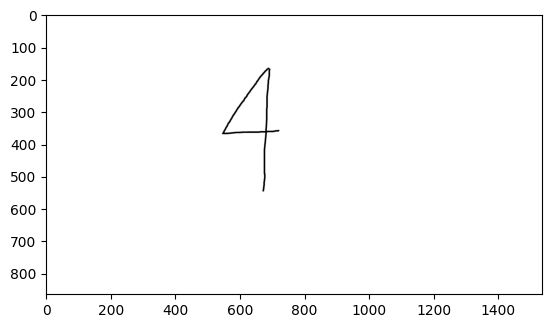

In [85]:
import matplotlib.pyplot as plt
import cv2
bgr_img = cv2.imread("digit_4.png")
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)


In [86]:
preprocessed_img = preprocess_image(rgb_img)

In [87]:
preprocessed_img.shape

torch.Size([1, 28, 28])

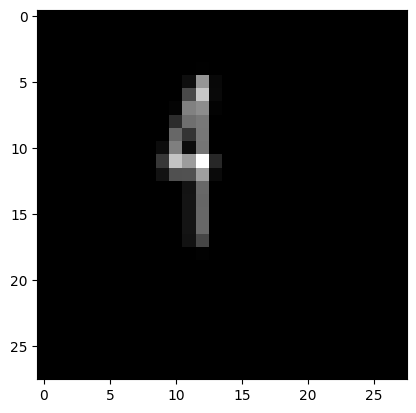

In [88]:
plt.imshow(preprocessed_img.squeeze(), cmap="gray")

In [89]:
inference(loaded_model, preprocessed_img)

8